Autores: Daniel de Paula, Gustavo Guerreiro e Mayara Cardoso Simões

# PARTE 3 E 4: REGRESSÃO LOGÍSTICA E SVM

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# PARTE 3: Regressão Logística

1. Utilize a base de dados construída no Trabalho 3 ‘risco_credito.pkl’, que possui 14 registros, para testar o algoritmo de Regressão Logística.


In [2]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
  X_risco_credito, y_risco_credito = pickle.load(f)

X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

2. Faça o Encoder dos dados e, para facilitar, como fizemos na aula teórica, apague os registros que possuem a classe ‘moderado’. No total teremos 11 registros.

In [3]:
# 2 = moderado
indices_moderado = [i for i, valor in enumerate(y_risco_credito) if valor == 2]
y_risco_credito = np.delete(y_risco_credito, indices_moderado)
X_risco_credito = np.delete(X_risco_credito, indices_moderado, axis=0)
print(y_risco_credito)
X_risco_credito

[0 0 0 1 1 0 1 1 0 1 0]


array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)


3. Treine o algoritmo de regressão logística e utilize o parâmetro ‘random_state =1’ para ter sempre o mesmo resultado.



In [4]:
from sklearn.linear_model import LogisticRegression

regressao_logistica = LogisticRegression(random_state=1)
regressao_logistica.fit(X_risco_credito, y_risco_credito)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


4. Utilize o comando ‘.intercept_’ para ter o resultado do B0.
O resultado deve ser =-0.80828993

In [5]:
regressao_logistica.intercept_

array([-0.80855152])

5. Utilize o comando ‘.coef_’ para ter o resultado dos demais parâmetros que deve ser:
array([[-0.76704533,  0.23906678, -0.47976059,  1.12186218]])

In [6]:
regressao_logistica.coef_

array([[-0.76706797,  0.23921064, -0.47989768,  1.12196145]])

6. Agora utilize o comando ‘predict’ para fazer o teste do seu algoritmo com:

    a) história boa, dívida alta, garantias nenhuma, renda > 35
    (o resultado desse teste deve ser ‘baixo’)

    b) história ruim, dívida alta, garantias adequada, renda < 15
    (o resultado desse teste deve ser ‘alto’)

In [7]:
nomes_classes = ['alto', 'baixo', 'moderado']

i = [[0, 0, 1, 2]]
previsao = regressao_logistica.predict(i)
print('I', nomes_classes[previsao[0]])

ii = [[2, 0, 0, 0]]
previsao = regressao_logistica.predict(ii)
print('II', nomes_classes[previsao[0]])

I baixo
II alto


## Algoritmo de Regressão Logística para uma base de dados maior (Credit Data)

7. Agora aplique a Regressão Logística na base de dados ‘credit.pkl’. De quanto foi a taxa de acerto?


In [8]:
from sklearn.metrics import accuracy_score, classification_report

with open('credit.pkl', 'rb') as f:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

regressao_logistica.fit(X_credit_treinamento, y_credit_treinamento)

previsao = regressao_logistica.predict(X_credit_teste)

taxa_de_acerto = accuracy_score(y_credit_teste, previsao)
print(f"Taxa de acerto: {taxa_de_acerto*100}%")

Taxa de acerto: 94.6%


8. O resultado com a base de dados ‘credit.pkl’ é melhor que os resultados do Naive Bayes e das Florestas Aleatórias? Descreva sua análise de resultados (observe que para isso você deverá visualizar os resultados da Matriz de Confusão, acurácia, precisão e recall).

As florestas aleatórias apresentaram resultados superiores. Tanto de acurácia, precisão e recall comparado com a regressão logística. O Naive Bayes se apresentou o pior em todos os pontos.

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       436
           1       0.79      0.78      0.79        64

    accuracy                           0.95       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.95      0.95      0.95       500



0.946

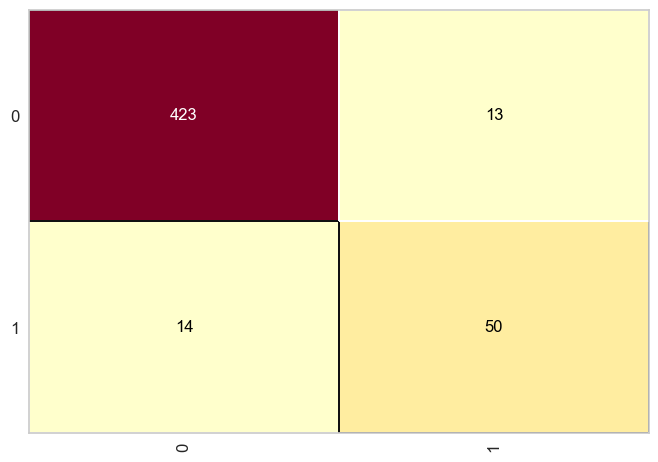

In [9]:
from yellowbrick.classifier import ConfusionMatrix

print(classification_report(y_credit_teste, previsao))

cm = ConfusionMatrix(regressao_logistica)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

# PARTE 4: SVM

1. Aplique o algoritmo SVM na base de dados ‘credit.pkl’.

In [10]:
from sklearn.svm import SVC

with open('credit.pkl', 'rb') as f:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

2. Inicialmente treine o SVM com kernel linear, valor do parâmetro C = 1.0 e ‘random_state =1’

In [11]:
maquina_vetor_suporte = SVC(C=1.0, random_state=1)
maquina_vetor_suporte.kernel = 'linear'
maquina_vetor_suporte.fit(X_credit_treinamento, y_credit_treinamento)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


3. Utilize o comando do sklearn accuray_score para calcular a acurácia do seu algoritmo. O resultado deve ser 0.946

In [12]:
previsao = maquina_vetor_suporte.predict(X_credit_teste)

accuracy_score(y_credit_teste, previsao)

0.946

4. Teste os demais kernels e anote os resultados. Qual o melhor kernel para a sua base de dados? rbf
    * Polinomial
    * Sigmoide
    * rbf

In [13]:
maquina_vetor_suporte.kernel = 'poly'
maquina_vetor_suporte.fit(X_credit_treinamento, y_credit_treinamento)
previsao = maquina_vetor_suporte.predict(X_credit_teste)
print("Polinomial =", accuracy_score(y_credit_teste, previsao))

maquina_vetor_suporte.kernel = 'sigmoid'
maquina_vetor_suporte.fit(X_credit_treinamento, y_credit_treinamento)
previsao = maquina_vetor_suporte.predict(X_credit_teste)
print("Sigmoide =", accuracy_score(y_credit_teste, previsao))

maquina_vetor_suporte.kernel = 'rbf'
maquina_vetor_suporte.fit(X_credit_treinamento, y_credit_treinamento)
previsao = maquina_vetor_suporte.predict(X_credit_teste)
print("rbf =", accuracy_score(y_credit_teste, previsao))

Polinomial = 0.968
Sigmoide = 0.838
rbf = 0.982


5. Aumente o valor do parâmetro C aplicado ao melhor kernel e verifique se há mudanças no resultado do seu SVM.
Sim, ele aumenta

In [14]:
maquina_vetor_suporte.kernel = 'rbf'
maquina_vetor_suporte.C = 10000
maquina_vetor_suporte.fit(X_credit_treinamento, y_credit_treinamento)
previsao = maquina_vetor_suporte.predict(X_credit_teste)
print("rbf =", accuracy_score(y_credit_teste, previsao))

rbf = 0.99


6. O Grid Search (pesquisa em grade) é uma técnica utilizada para melhorar a precisão e a generalização dos modelos de aprendizado de máquina. Ela é usada para realizar ajustes de hiperparâmetros durante o treinamento de um modelo. O grid search automatiza o processo de encontrar hiperparâmetros ideais, economizando esforço humano em comparação com o ajuste manual, mas pode até ser mais custoso do ponto de vista de desempenho, pois testa todas as combinações possíveis e retorna a que obteve melhor desempenho.
Agora, aplique o GridSearch do Scikit-Learn (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) para ajudar a identificar os melhores hiperparâmetros para o seu modelo. Qual foi a melhor combinação de hiperparâmetros encontrada? O modelo com melhor desempenho foi obtido com os parâmetros ajustados manualmente ou com o GridSearch?

Os testes do GridSearch ajudaram a encontrar os valores corretos.

In [15]:
from sklearn.model_selection import GridSearchCV

parametros = {
    'C': [0.1, 1, 10, 100, 1_000, 10_000],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(
    estimator=maquina_vetor_suporte,
    param_grid=parametros,
    scoring='accuracy',
    cv=2,
    n_jobs=-1
)

grid.fit(X_credit_treinamento, y_credit_treinamento)

print("Melhores parâmetros:", grid.best_params_)
print("Melhor acurácia média (cross-val):", grid.best_score_)


Melhores parâmetros: {'C': 10000, 'gamma': 'scale', 'kernel': 'rbf'}
Melhor acurácia média (cross-val): 0.9913333333333334


In [16]:
melhor_modelo = grid.best_estimator_

y_pred = melhor_modelo.predict(X_credit_teste)
print("Acurácia no teste:", accuracy_score(y_credit_teste, y_pred))

Acurácia no teste: 0.99


In [17]:
maquina_vetor_suporte.C = 10000
maquina_vetor_suporte.kernel = 'rbf'
maquina_vetor_suporte.gamma = 'scale'
maquina_vetor_suporte.fit(X_credit_treinamento, y_credit_treinamento)
previsao = maquina_vetor_suporte.predict(X_credit_teste)
accuracy_score(y_credit_teste, previsao)

0.99

## Base de Dados Credit Data

# Análise dos resultados dos 4 algoritmos utilizados:

6. O resultado do SVM é melhor que os resultados do Naive Bayes, Florestas Aleatórias e Regressão Logística? Descreva sua análise de resultados (observe que para isso você deverá visualizar os resultados da Matriz de Confusão, acurácia, precisão e recall).

Obs.: as matrizes de confusão junto dos dados de acurácia, precisão e recall dos outros modelos estão disponíveis em seus respectivos nos outros arquivos "`.ipynb`". Para os dados de precisão e acurácia foi verificada a métrica na linha `weighted avg` do `classification_report`.

Sim, o SVM supera todos os outros algoritmos utilizados em todas as métricas.

|                        | Naïve Bayes            | Florestas Aleatórias  | Regressão Logística    | SVM                      |
|------------------------|------------------------|-----------------------|------------------------|--------------------------|
| **Matriz de Confusão** | Acertos: 469 Erros: 31 | Acertos: 492 Erros: 8 | Acertos: 473 Erros: 27 | Acertos: 495 Erros: 5 👑 |
| **Acurácia**           | 0.94                   | 0.98                  | 0.95                   | 0.99 👑                  |
| **Precisão**           | 0.93                   | 0.98                  | 0.95                   | 0.99 👑                  |
| **Recall**             | 0.94                   | 0.98                  | 0.95                   | 0.99 👑                  |


Em todas as métricas analisadas, o SVM demonstrou ser o modelo mais preciso.


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       436
           1       0.98      0.94      0.96        64

    accuracy                           0.99       500
   macro avg       0.99      0.97      0.98       500
weighted avg       0.99      0.99      0.99       500



0.99

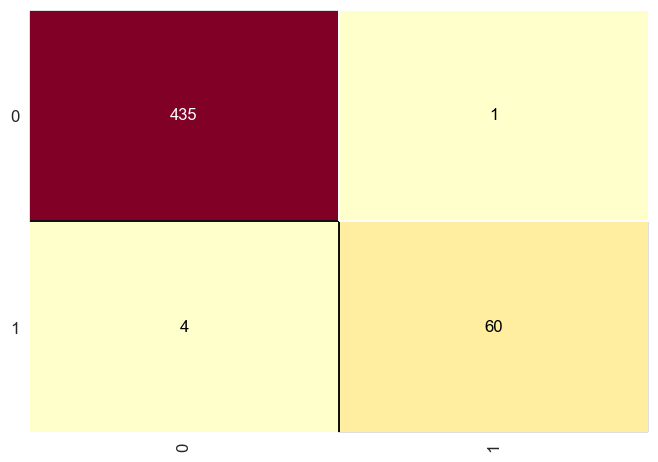

In [18]:
from yellowbrick.classifier import ConfusionMatrix

print(classification_report(y_credit_teste, previsao))

cm = ConfusionMatrix(maquina_vetor_suporte)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)